## Importing packages

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.calibration import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from dateutil.parser import parse 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression


## Data  loading

In [2]:
train_data = pd.DataFrame(pd.read_csv('train.csv'))
train_data.drop(columns=['satisfaction_client (%)'], inplace=True)
test_data = pd.DataFrame(pd.read_csv('test.csv'))
data = pd.concat([train_data, test_data], ignore_index=True)


In [3]:
print('train shape:', train_data.shape)
print('test shape:', test_data.shape)

train shape: (11998, 11)
test shape: (7981, 11)


In [4]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2/19/2019,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,4/8/2019,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,6/28/2018,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,6/10/2019,NaN,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,7/14/2018,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2/5/2019,NaN,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,11/20/2018,Email,East,NaN,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,1/5/2021,NaN,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,9/20/2020,NaN,West,18-25,NaN,103822.94,66.0,2670.0,1.22,0.19


## Overview of the dataset

In [5]:
data.shape

(19979, 11)

In [6]:
data.columns

Index(['ID', 'date', 'campaign_type', 'region', 'customer_age_range', 'gender',
       'sales', 'units_sold', 'clients_engaged', 'click_rate',
       'conversion_rate'],
      dtype='object')

In [7]:
# data types of all dataframe's columns
data.dtypes

ID                     object
date                   object
campaign_type          object
region                 object
customer_age_range     object
gender                 object
sales                 float64
units_sold            float64
clients_engaged       float64
click_rate            float64
conversion_rate       float64
dtype: object

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19979 non-null  object 
 1   date                19965 non-null  object 
 2   campaign_type       16703 non-null  object 
 3   region              16018 non-null  object 
 4   customer_age_range  16738 non-null  object 
 5   gender              15023 non-null  object 
 6   sales               19955 non-null  float64
 7   units_sold          19959 non-null  float64
 8   clients_engaged     19959 non-null  float64
 9   click_rate          19953 non-null  float64
 10  conversion_rate     19954 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB


In [9]:
data.describe()

,sales,units_sold,clients_engaged,click_rate,conversion_rate
count,19955.000000,19959.000000,19959.000000,19953.000000,19954.000000
mean,75452.573622,50.457287,1496.384438,0.779424,0.155965
std,43120.669100,28.688081,865.496557,0.420007,0.083412
min,505.410000,1.000000,10.000000,0.050000,0.010000
25%,38174.865000,26.000000,746.000000,0.420000,0.080000
50%,75856.220000,50.000000,1493.000000,0.780000,0.160000
75%,112634.190000,75.000000,2247.500000,1.140000,0.230000
max,149991.390000,100.000000,3000.000000,1.500000,0.300000


In [10]:
# duplicates
data.duplicated().sum()

0

## Cleaning And Transformation of the Data

#### date formatting

In [11]:
#convert date columns to actual date columns
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_datetime(data[col])
        except ValueError:
            pass
# the date format now is "YYYY-MM-DD  HH:mm:ss", get_date_format method is meant to remove the last part of the date
def get_date_format(date_string):
    try:
        parsed_date = parse(date_string, fuzzy=True)
        return parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        return None
data['date'] = data['date'].apply(lambda x: get_date_format(str(x)))



C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2712\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed 

In [12]:
data.date.unique()

array(['2019-02-19', '2019-04-08', '2018-06-28', ..., '2019-06-24',
       '2020-09-22', '2018-04-21'], dtype=object)

In [13]:
# Identifying missing values for each column in the dataframe
data.isnull().sum()

ID                       0
date                    14
campaign_type         3276
region                3961
customer_age_range    3241
gender                4956
sales                   24
units_sold              20
clients_engaged         20
click_rate              26
conversion_rate         25
dtype: int64

<Axes: >

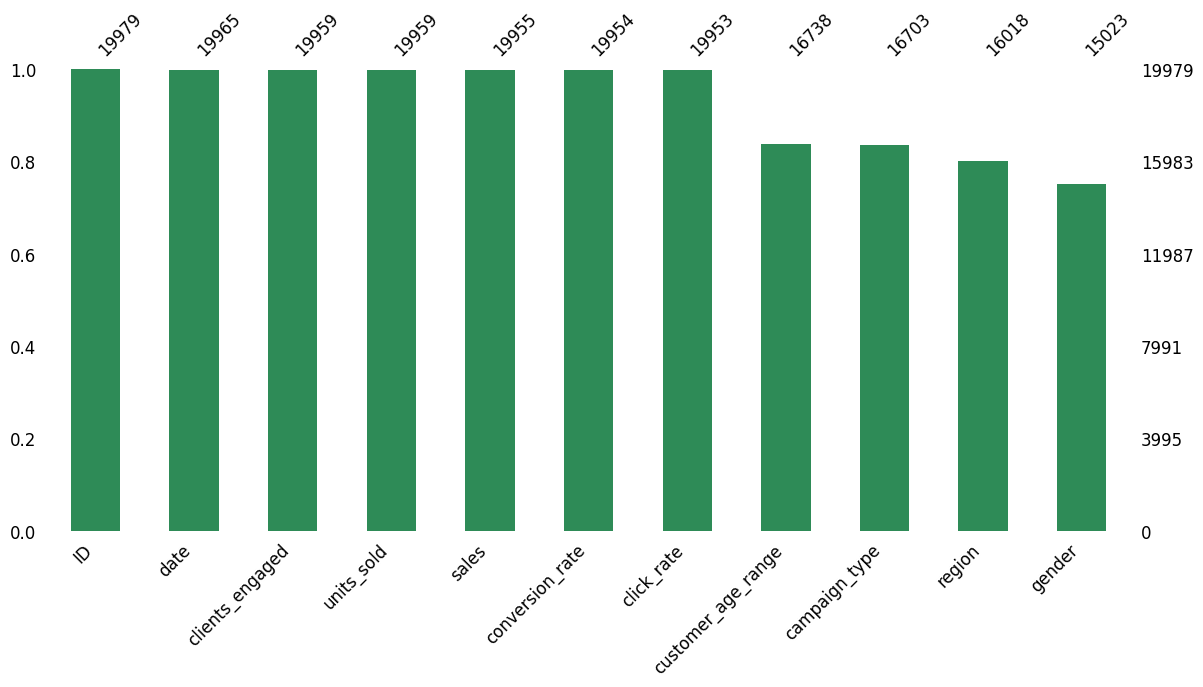

In [14]:
# visualize the missing values using missingo matrix
msno.bar(data, figsize=(14,6), fontsize=12, color="seagreen",  sort="descending")

In [15]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,NaN,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,NaN,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,NaN,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,NaN,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,NaN,West,18-25,NaN,103822.94,66.0,2670.0,1.22,0.19


#### 1. Implementing MICE algorithm for filling the missing values in categorical columns


In [16]:
# Implementation of the MICE algorithm for categorical variables
def MiceAlgorithm(col):
    # change the values categ to numbers 
    le = preprocessing.LabelEncoder()
    impute_col = col
    impute_col_encoded = col

    le.fit(data.loc[:,impute_col])
    LabelEncoder()

    # label mapping
    dict(zip(le.classes_,le.transform(le.classes_)))
    d = dict(zip(le.classes_,le.transform(le.classes_)))[np.nan]
    print(d)
    data[impute_col_encoded] = le.transform(data[impute_col])

    # Replace the 4 mapped to NaN to NaN in the encoded column
    data[impute_col_encoded] = data[impute_col_encoded].map(lambda x: np.nan if x==d else x)
    # data.head()


    # Start MICE imputation
    imputer  = IterativeImputer(random_state=100)
    train = data.loc[:,['sales','clients_engaged','click_rate','conversion_rate',impute_col_encoded]]
    imputer.fit(train)
    IterativeImputer(random_state=100)
    data_imputed = imputer.transform(train)
    # data_imputed
    # Rounding the data 
    np.round(data_imputed)
    # Replace with the imputed values
    data.loc[:,[impute_col_encoded]] = data_imputed[:,4].round()
    # Inverse transformation to categorical values
    gender_imputed = list(le.inverse_transform(data[impute_col_encoded].round().astype(int)))
    data[impute_col_encoded] = gender_imputed



In [17]:
MiceAlgorithm('campaign_type')
data.head()

5


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26


In [18]:
MiceAlgorithm('customer_age_range')
data.head()

5


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,NaN,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26


In [19]:
MiceAlgorithm('region')
data.head()


4


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,NaN,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26


In [20]:
# Apply the algorithm on the categorical data that includes missing values
MiceAlgorithm('gender')
data.head()

3


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26


#### 2. Imputation using the mean

In [21]:
missing_cols = ['sales', 'units_sold', 'clients_engaged', 'click_rate', 'conversion_rate']

# Mean imputation
for col in missing_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data    

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,Online Advertising,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,36-45,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,Online Advertising,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,Online Advertising,West,18-25,Male,103822.94,66.0,2670.0,1.22,0.19


#### 3.Handling  nan values in the column date

In [22]:
# Convert 'date' column to datetime if it's not already in datetime format
data['date'] = pd.to_datetime(data['date'])
# Extract non-missing dates and corresponding values
data_train = data.dropna()
X_train = data_train[['sales', 'units_sold', 'clients_engaged', 'click_rate', 'conversion_rate']]
y_train = data_train['date'].dt.dayofyear  # Convert date to day of year for simplicity

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing dates
X_pred = data[data['date'].isnull()][['sales', 'units_sold', 'clients_engaged', 'click_rate', 'conversion_rate']]
y_pred_dayofyear = model.predict(X_pred)

# Impute missing dates using predicted day of year
data.loc[data['date'].isnull(), 'date'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(y_pred_dayofyear, unit='D')

print("\nDataFrame after date prediction:")
data


DataFrame after date prediction:


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,Online Advertising,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,36-45,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,Online Advertising,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,Online Advertising,West,18-25,Male,103822.94,66.0,2670.0,1.22,0.19


In [23]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,Online Advertising,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,36-45,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,Online Advertising,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,Online Advertising,West,18-25,Male,103822.94,66.0,2670.0,1.22,0.19


In [24]:
data.isnull().sum().sum()

0

### Outliers detection

In [25]:
# Function to detect outliers in a DataFrame using quantile regression method
def detect_outliers(df):
    outlier_indices = []

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    return df.iloc[outlier_indices]

# Detecting outliers
outliers_df = detect_outliers(data)
print("Outliers in the dataset:")
print(outliers_df)

Outliers in the dataset:
Empty DataFrame
Columns: [ID, date, campaign_type, region, customer_age_range, gender, sales, units_sold, clients_engaged, click_rate, conversion_rate]
Index: []


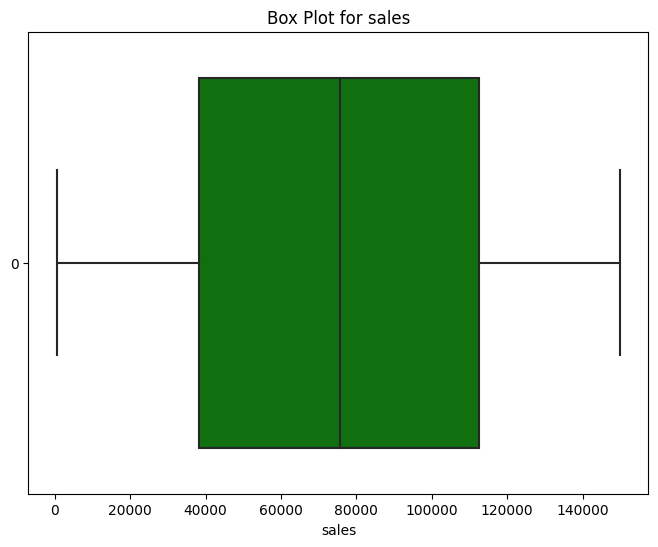

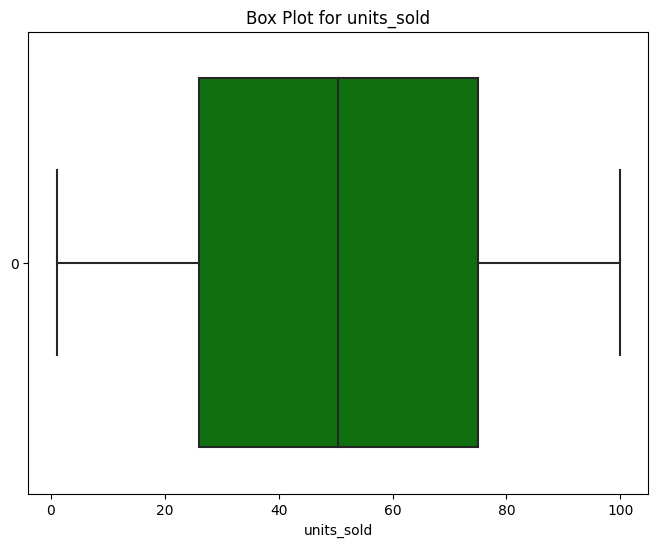

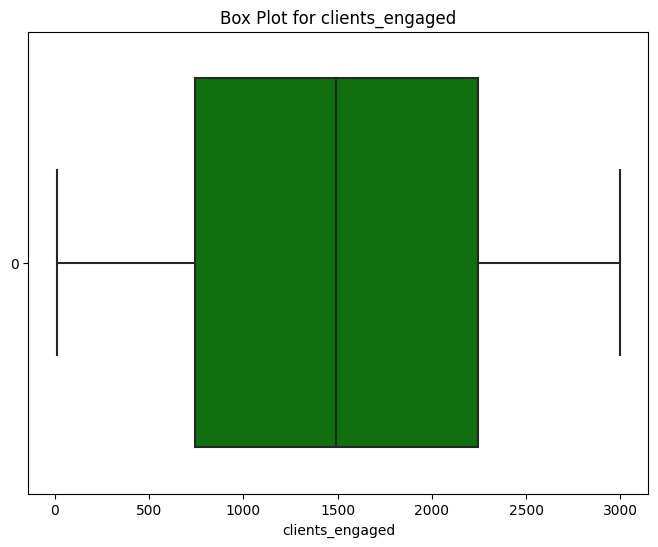

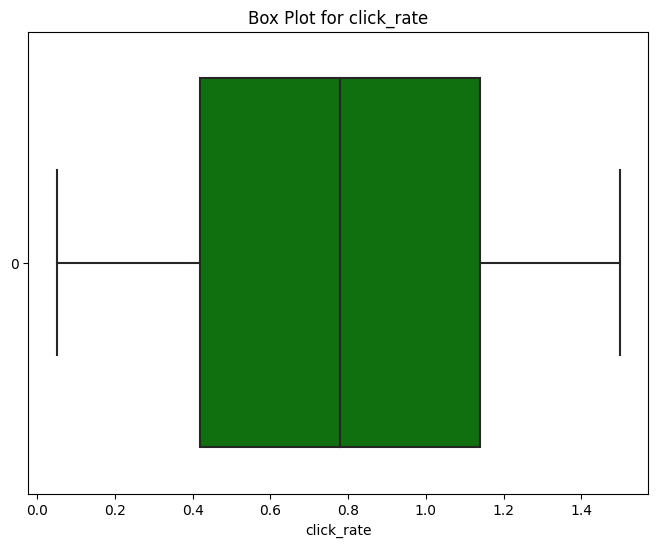

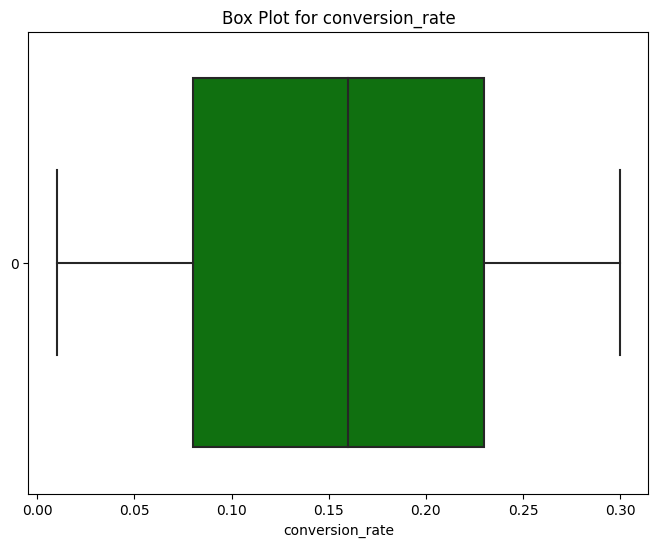

In [26]:
# Visualizing outliers
def plot_outliers(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column], orient='h',color='green')
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()
plot_outliers(data)  

#### Typos detection using unique values 

In [27]:
for column in data.columns:
    print("Unique date formats in the column:", data[column].unique())
# no typos detected

Unique date formats in the column: ['Kq6531' 'Zh5785' 'Si1260' ... 'Ey4897' 'Aw5933' 'Lj2829']
Unique date formats in the column: <DatetimeArray>
[          '2019-02-19 00:00:00',           '2019-04-08 00:00:00',
           '2018-06-28 00:00:00',           '2019-06-10 00:00:00',
           '2018-07-14 00:00:00',           '2020-07-26 00:00:00',
           '2021-02-15 00:00:00',           '2021-08-15 00:00:00',
           '2021-06-06 00:00:00',           '2021-06-21 00:00:00',
 ...
           '2019-05-16 00:00:00', '2022-07-02 01:21:16.558621067',
 '2022-07-05 10:14:37.729378904',           '2019-06-24 00:00:00',
 '2022-06-30 14:56:23.175614987', '2022-07-03 07:34:00.109372206',
 '2022-07-03 08:57:09.966090867', '2022-07-06 15:25:33.187381671',
           '2020-09-22 00:00:00',           '2018-04-21 00:00:00']
Length: 1840, dtype: datetime64[ns]
Unique date formats in the column: ['Online Advertising' 'TV' 'Email' 'Social Networks' 'Direct Advertising']
Unique date formats in the column

## Aggregation And Analysis of the Data

In [28]:
statistics = data.groupby(['campaign_type', 'region']).agg({
    'sales': ['sum', 'mean', 'median'],
    'units_sold': ['sum', 'mean', 'median'],
    'clients_engaged': ['sum', 'mean', 'median'],
    'click_rate': ['mean'],
    'conversion_rate': ['mean']
})

statistics.columns = [
    'Total Sales', 'Average Sales', 'Median Sales',
    'Total Units Sold', 'Average Units Sold', 'Median Units Sold',
    'Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged',
    'Mean Click Rate', 'Mean Conversion Rate'
]

statistics.reset_index(inplace=True)
print(statistics)


         campaign_type region   Total Sales  Average Sales  Median Sales  \
0   Direct Advertising   East  5.808763e+07   76330.653469     77001.600   
1   Direct Advertising  North  7.308541e+07   66805.680122     63636.240   
2   Direct Advertising  South  7.475335e+07   83616.726015     91526.485   
3   Direct Advertising   West  4.862482e+07   71507.094858     70190.960   
4                Email   East  4.756653e+07   74206.753408     72871.300   
5                Email  North  7.205609e+07   66349.990746     62549.110   
6                Email  South  7.626254e+07   89091.747679     99267.790   
7                Email   West  4.875402e+07   75006.178959     77618.045   
8   Online Advertising   East  9.851020e+07   75835.409192     75614.890   
9   Online Advertising  North  1.491741e+08   66299.596051     64301.895   
10  Online Advertising  South  1.497706e+08   87790.485634     97856.935   
11  Online Advertising   West  1.062374e+08   78058.321683     77500.570   
12     Socia

In [29]:
# Group by 'campaign_type' and calculate statistics
campaign_statistics = data.groupby('campaign_type').agg({
    'sales': ['sum', 'mean', 'median'],
    'units_sold': ['sum', 'mean', 'median'],
    'clients_engaged': ['sum', 'mean', 'median'],
    'click_rate': ['mean'],
    'conversion_rate': ['mean']
})
# Rename columns
campaign_statistics.columns = [
    'Total Sales', 'Average Sales', 'Median Sales',
    'Total Units Sold', 'Average Units Sold', 'Median Units Sold',
    'Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged',
    'Mean Click Rate', 'Average Conversion Rate'
]
# Reset index
campaign_statistics.reset_index(inplace=True)

# Print statistics
print(campaign_statistics)


        campaign_type   Total Sales  Average Sales  Median Sales  \
0  Direct Advertising  2.545512e+08   74234.826161      74008.67   
1               Email  2.446392e+08   75669.400316      77493.65   
2  Online Advertising  5.036922e+08   76132.441348      76236.98   
3     Social Networks  2.567194e+08   75997.441719      76160.83   
4                  TV  2.478650e+08   74590.727709      74749.91   

   Total Units Sold  Average Units Sold  Median Units Sold  \
0     172594.371862           50.333733          50.457287   
1     161141.914575           49.842844          49.000000   
2     337527.201012           51.016808          51.000000   
3     169301.914575           50.118980          50.000000   
4     167520.743725           50.412502          50.457287   

   Total Clients Engaged  Average Clients Engaged  Median Clients Engaged  \
0           5.173545e+06              1508.762142                  1528.0   
1           4.886617e+06              1511.480716               

In [30]:
# Group by 'region' and calculate statistics
region_statistics = data.groupby('region').agg({'sales': ['sum', 'mean', 'median'],'units_sold': ['sum', 'mean', 'median'],'clients_engaged': ['sum', 'mean', 'median'],'click_rate': ['mean'],'conversion_rate': ['mean']})
# Rename columns
region_statistics.columns = ['Total Sales', 'Average Sales', 'Median Sales','Total Units Sold', 'Average Units Sold', 'Median Units Sold','Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged','Mean Click Rate', 'Average Conversion Rate']
# Reset index
region_statistics.reset_index(inplace=True)
# Print statistics
print(region_statistics)


  region   Total Sales  Average Sales  Median Sales  Total Units Sold  \
0   East  3.044791e+08   75050.300917  74743.930000     202037.457287   
1  North  4.421540e+08   66260.153275  63294.140000     337171.658300   
2  South  4.559735e+08   87317.792832  96957.255000     265727.201012   
3   West  3.048604e+08   75704.092524  75452.573622     203149.829150   

   Average Units Sold  Median Units Sold  Total Clients Engaged  \
0           49.799718               50.0           5.994484e+06   
1           50.527747               51.0           9.825756e+06   
2           50.886097               51.0           8.073373e+06   
3           50.446940               50.0           6.002651e+06   

   Average Clients Engaged  Median Clients Engaged  Mean Click Rate  \
0              1477.565784                  1460.0         0.779667   
1              1472.464570                  1461.0         0.777871   
2              1546.030890                  1576.5         0.783180   
3             

## Visualization of Data Advanced

In [31]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,Online Advertising,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,36-45,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,Online Advertising,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,Online Advertising,West,18-25,Male,103822.94,66.0,2670.0,1.22,0.19


<span>Time series plot of the sales</span>

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

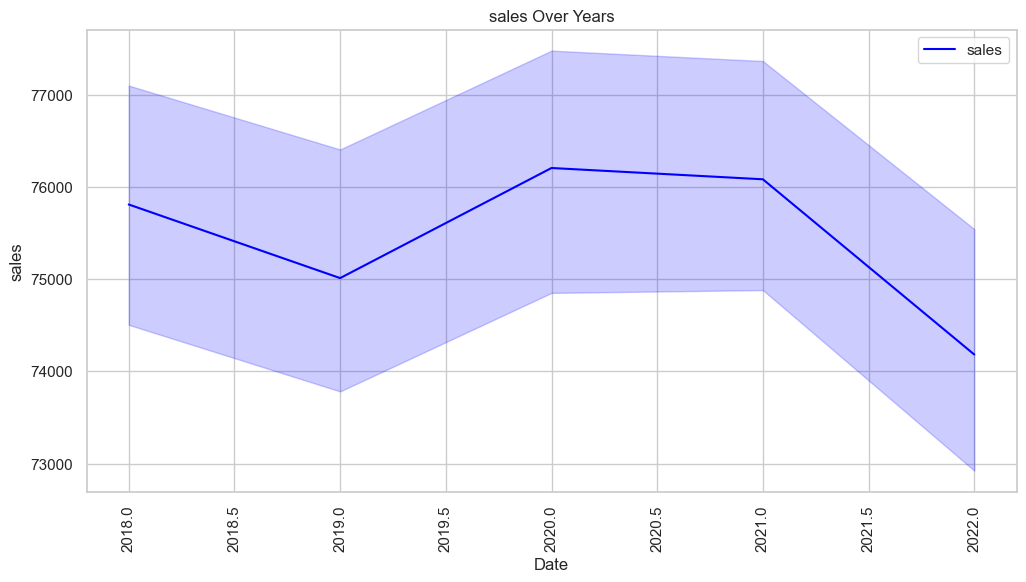

In [32]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
sns.set(style="whitegrid") 
data['year'] = data['date'].dt.year
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=data, x='year', y='sales', label='sales', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('sales Over Years')
plt.xticks(rotation=90)
plt.show()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

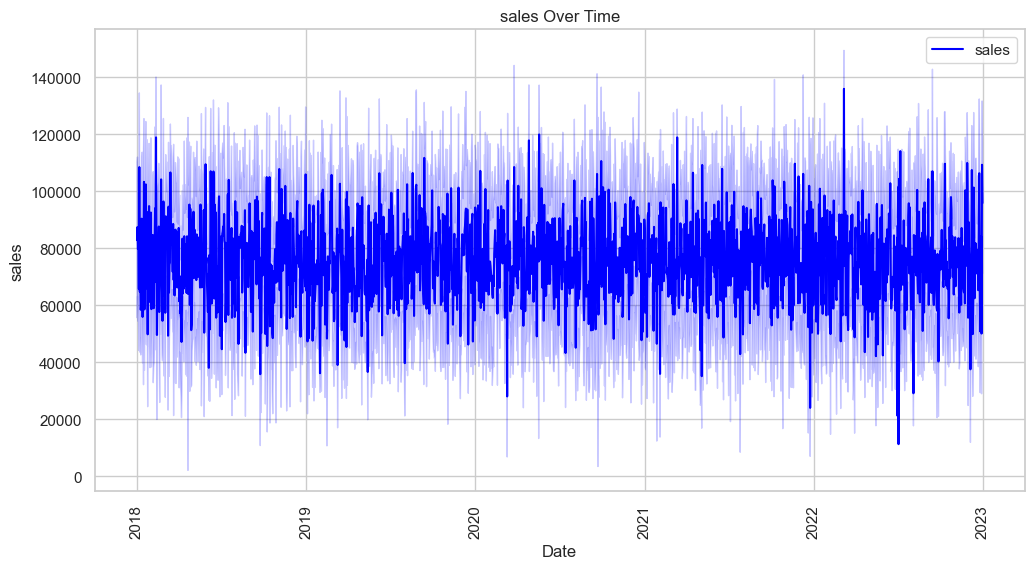

In [33]:
df = data.sort_values('date')
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='date', y='sales', label='sales', color='blue')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('sales Over Time')
plt.xticks(rotation=90)
plt.show()


<span>Time series plot of the customer engagement</span>

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

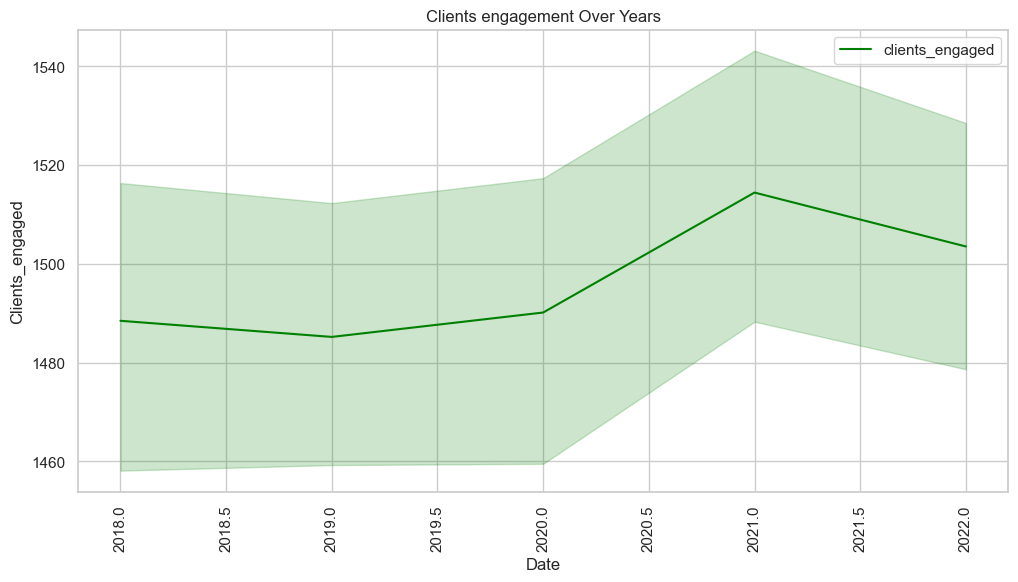

In [34]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=data, x='year', y='clients_engaged', label='clients_engaged', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Clients_engaged')
plt.title('Clients engagement Over Years')
plt.xticks(rotation=90)
plt.show()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

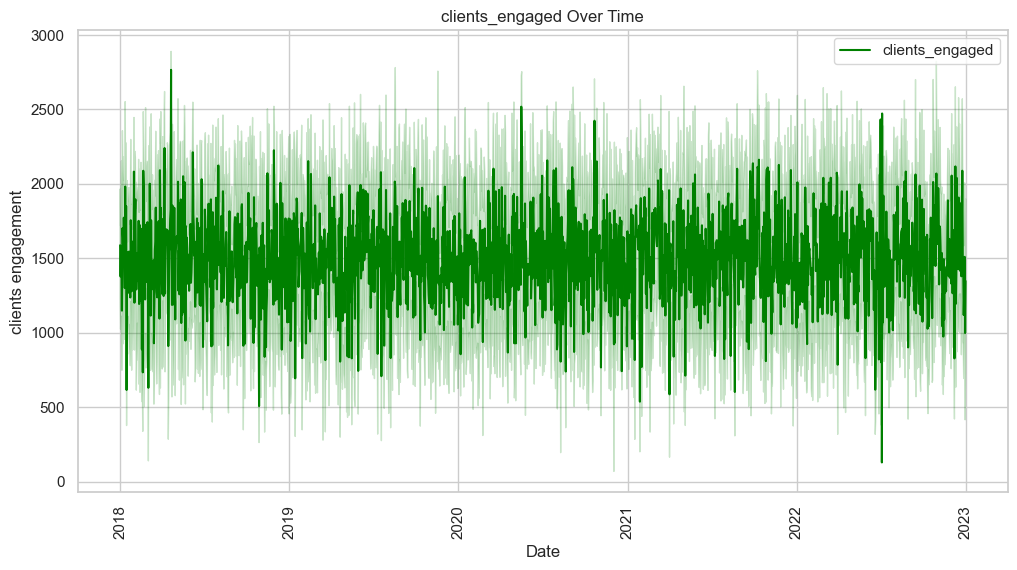

In [35]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='date', y='clients_engaged', label='clients_engaged', color='green')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('clients engagement')
plt.title('clients_engaged Over Time')
plt.xticks(rotation=90)
plt.show()

In [36]:
data.drop(columns='year',axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

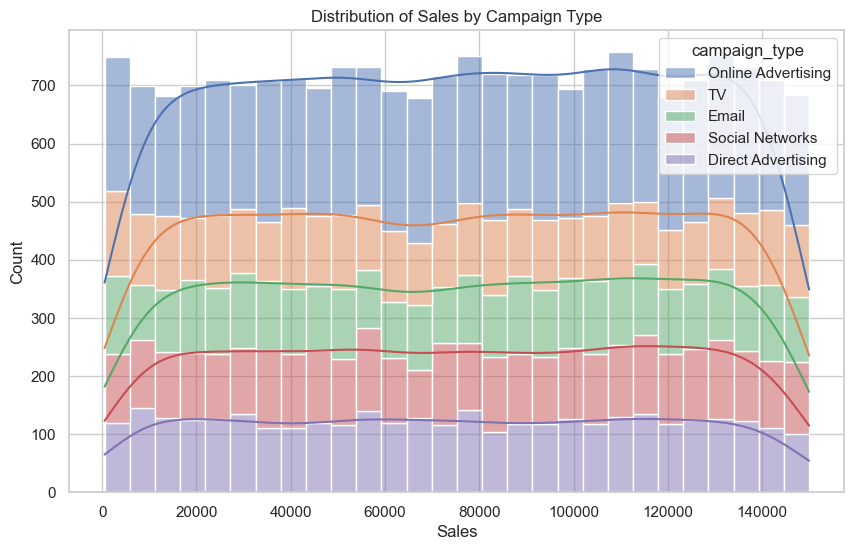

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sales', hue='campaign_type', kde=True, multiple='stack')
plt.title('Distribution of Sales by Campaign Type')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

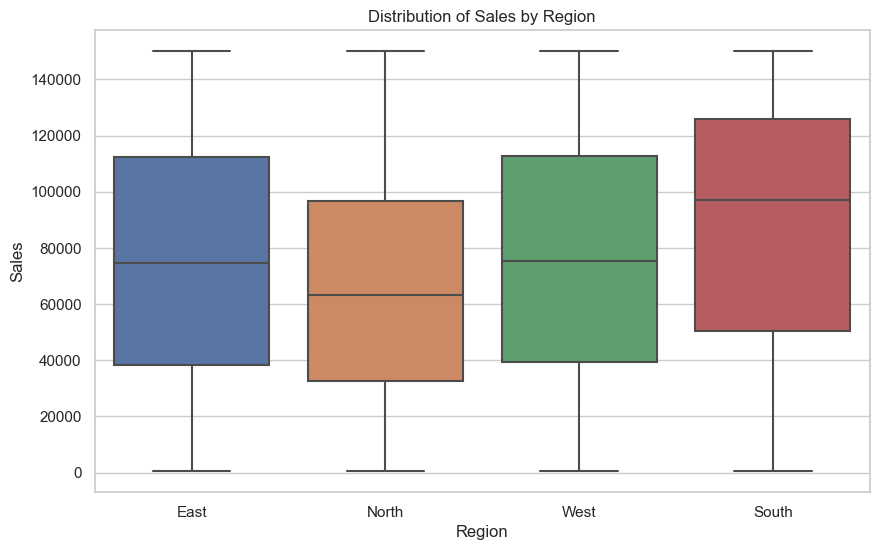

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='sales', data=data)
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

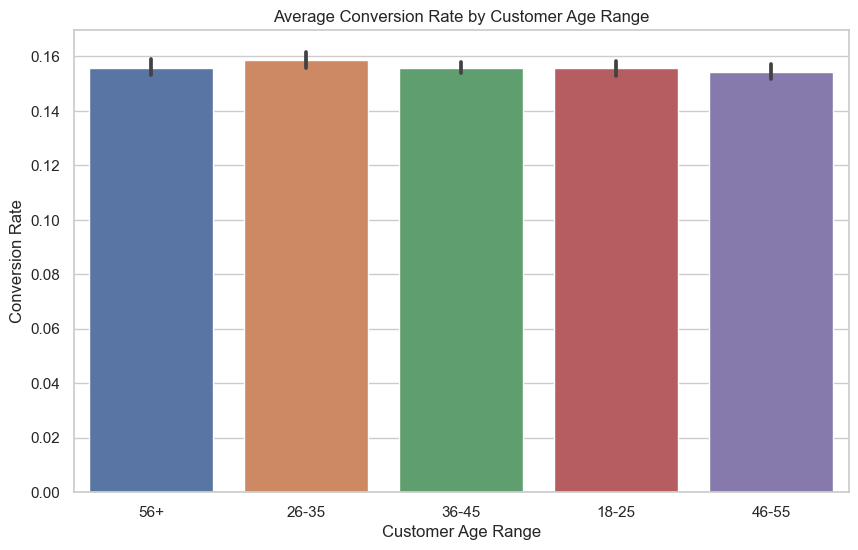

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_age_range', y='conversion_rate', data=data)
plt.title('Average Conversion Rate by Customer Age Range')
plt.xlabel('Customer Age Range')
plt.ylabel('Conversion Rate')
plt.show()

In [40]:
"""plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='region', y='Average Customer Satisfaction', data=region_statistics)
plt.title('Average Customer Satisfaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Customer Satisfaction (%)')

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.subplot(1, 2, 2)
sns.barplot(x='campaign_type', y='Average Customer Satisfaction', data=campaign_statistics)
plt.title('Average Customer Satisfaction by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Customer Satisfaction (%)')

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.tight_layout()

plt.show()"""

"plt.figure(figsize=(14, 7))\n\nplt.subplot(1, 2, 1)\nsns.barplot(x='region', y='Average Customer Satisfaction', data=region_statistics)\nplt.title('Average Customer Satisfaction by Region')\nplt.xlabel('Region')\nplt.ylabel('Average Customer Satisfaction (%)')\n\nfor p in plt.gca().patches:\n    plt.gca().annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), \n                       textcoords='offset points')\n\nplt.subplot(1, 2, 2)\nsns.barplot(x='campaign_type', y='Average Customer Satisfaction', data=campaign_statistics)\nplt.title('Average Customer Satisfaction by Campaign Type')\nplt.xlabel('Campaign Type')\nplt.ylabel('Average Customer Satisfaction (%)')\n\nfor p in plt.gca().patches:\n    plt.gca().annotate('{:.1f}%'.format(p.get_height()), \n                       (p.get_x() + p.get_width() / 2., p.get_height()), \n                       ha='center', va='center', fontsi

<span >Scatter Plots</span>

In [41]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13
2,Si1260,2018-06-28,TV,North,26-35,Male,35385.73,1.0,2299.0,0.51,0.08
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26
...,...,...,...,...,...,...,...,...,...,...,...
19974,Ms5176,2019-02-05,Online Advertising,East,26-35,Female,45562.64,8.0,642.0,1.36,0.16
19975,Fz1417,2018-11-20,Email,East,36-45,Male,31524.54,65.0,1982.0,0.28,0.03
19976,Ey4897,2021-01-05,Online Advertising,West,46-55,Female,67450.37,87.0,669.0,0.29,0.19
19977,Aw5933,2020-09-20,Online Advertising,West,18-25,Male,103822.94,66.0,2670.0,1.22,0.19


Text(0, 0.5, 'Conversion Rate')

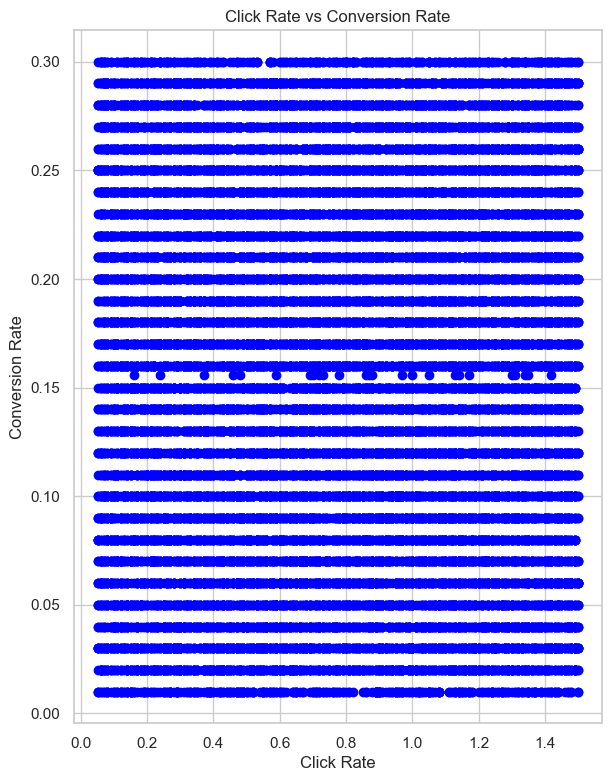

In [42]:
# Plot CTR vs CR
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
plt.scatter('click_rate', 'conversion_rate', color='blue',data=data)
plt.title('Click Rate vs Conversion Rate')
plt.xlabel('Click Rate')
plt.ylabel('Conversion Rate')

array([[<Axes: xlabel='sales', ylabel='sales'>,
        <Axes: xlabel='units_sold', ylabel='sales'>,
        <Axes: xlabel='clients_engaged', ylabel='sales'>,
        <Axes: xlabel='click_rate', ylabel='sales'>,
        <Axes: xlabel='conversion_rate', ylabel='sales'>],
       [<Axes: xlabel='sales', ylabel='units_sold'>,
        <Axes: xlabel='units_sold', ylabel='units_sold'>,
        <Axes: xlabel='clients_engaged', ylabel='units_sold'>,
        <Axes: xlabel='click_rate', ylabel='units_sold'>,
        <Axes: xlabel='conversion_rate', ylabel='units_sold'>],
       [<Axes: xlabel='sales', ylabel='clients_engaged'>,
        <Axes: xlabel='units_sold', ylabel='clients_engaged'>,
        <Axes: xlabel='clients_engaged', ylabel='clients_engaged'>,
        <Axes: xlabel='click_rate', ylabel='clients_engaged'>,
        <Axes: xlabel='conversion_rate', ylabel='clients_engaged'>],
       [<Axes: xlabel='sales', ylabel='click_rate'>,
        <Axes: xlabel='units_sold', ylabel='click_rate'>,
 

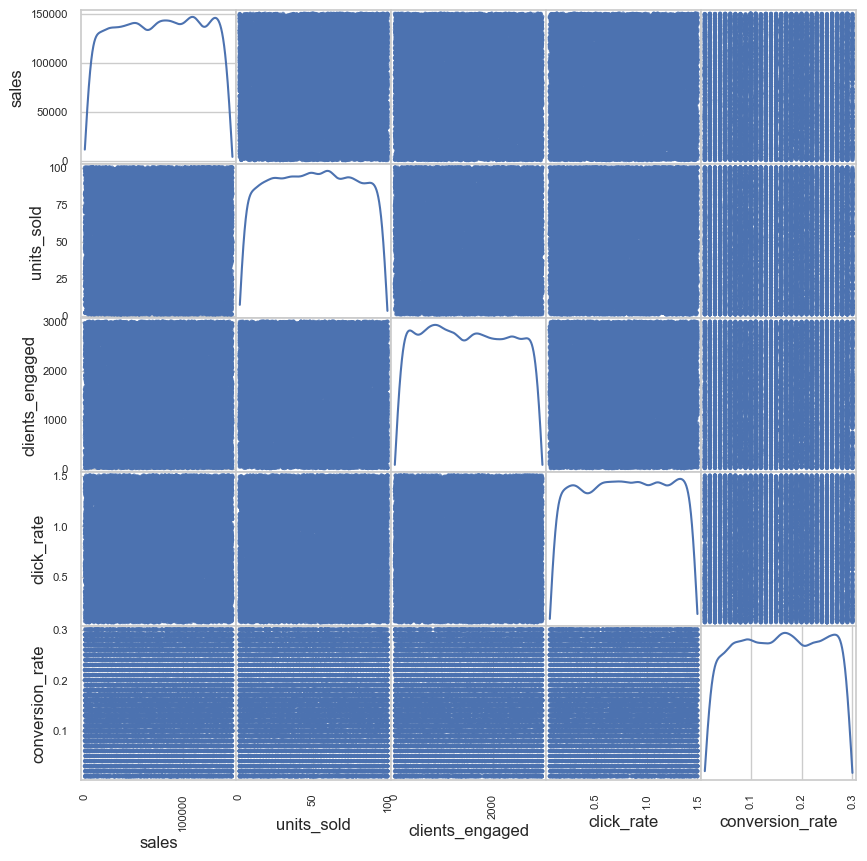

In [43]:
scatter_matrix(data, figsize=(10, 10), alpha=0.8, diagonal='kde')

In [48]:
data.columns

Index(['ID', 'date', 'campaign_type', 'region', 'customer_age_range', 'gender',
       'sales', 'units_sold', 'clients_engaged', 'click_rate',
       'conversion_rate'],
      dtype='object')

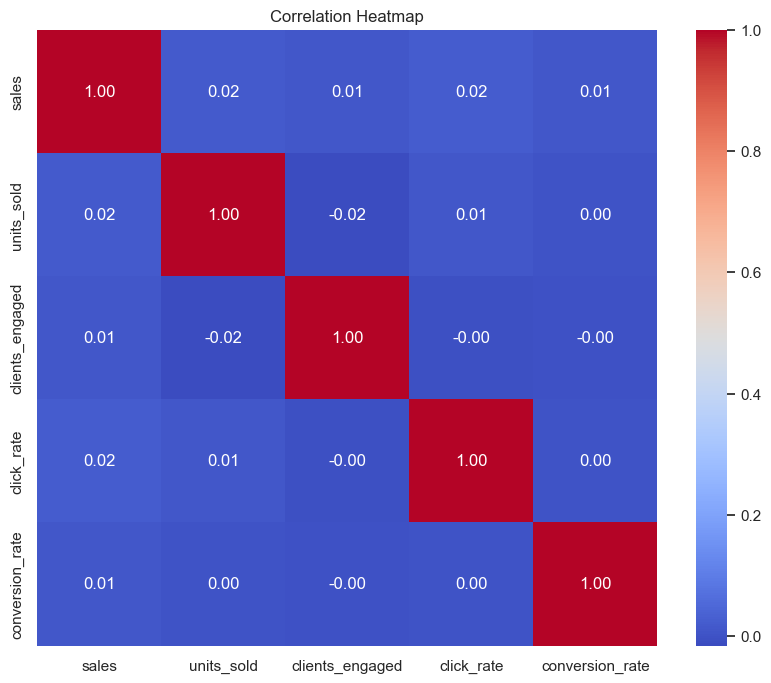

In [49]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['sales','units_sold','clients_engaged','click_rate','conversion_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

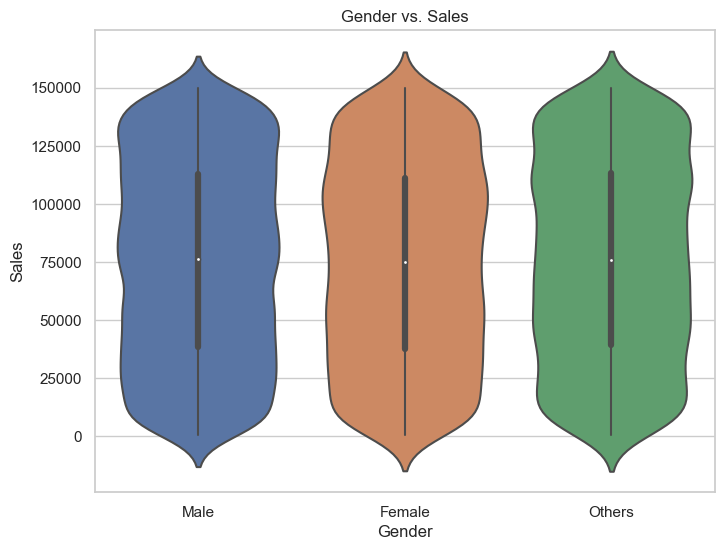

In [50]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='sales', data=data)
plt.title('Gender vs. Sales')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()